In [1]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect("../sql/ecommerce.db")

# Test query
query = """
SELECT
    COUNT(DISTINCT order_id) AS total_orders,
    ROUND(SUM(payment_value), 2) AS total_revenue,
    ROUND(SUM(payment_value) / COUNT(DISTINCT order_id), 2) AS avg_order_value
FROM order_payments;
"""

df = pd.read_sql_query(query, conn)
df


,total_orders,total_revenue,avg_order_value
0,99441,15744810.66,158.33


In [2]:
# Explore Customer Behavior & Repeat Orders for the Top 10 repeat customers.

query_repeat_customers = """
SELECT
    c.customer_unique_id,
    COUNT(o.order_id) AS total_orders
FROM orders o
JOIN customers c
    ON o.customer_id = c.customer_id
GROUP BY c.customer_unique_id
HAVING COUNT(o.order_id) > 1
ORDER BY total_orders DESC
LIMIT 10;
"""

df_repeat_customers = pd.read_sql_query(query_repeat_customers, conn)
df_repeat_customers


,customer_unique_id,total_orders
0,8d50f5eadf50201ccdcedfb9e2ac8455,17
1,3e43e6105506432c953e165fb2acf44c,9
2,ca77025e7201e3b30c44b472ff346268,7
3,6469f99c1f9dfae7733b25662e7f1782,7
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7
5,f0e310a6839dce9de1638e0fe5ab282a,6
6,de34b16117594161a6a89c50b289d35a,6
7,dc813062e0fc23409cd255f7f53c7074,6
8,63cfc61cee11cbe306bff5857d00bfe4,6
9,47c1a3033b8b77b3ab6e109eb4d5fdf3,6


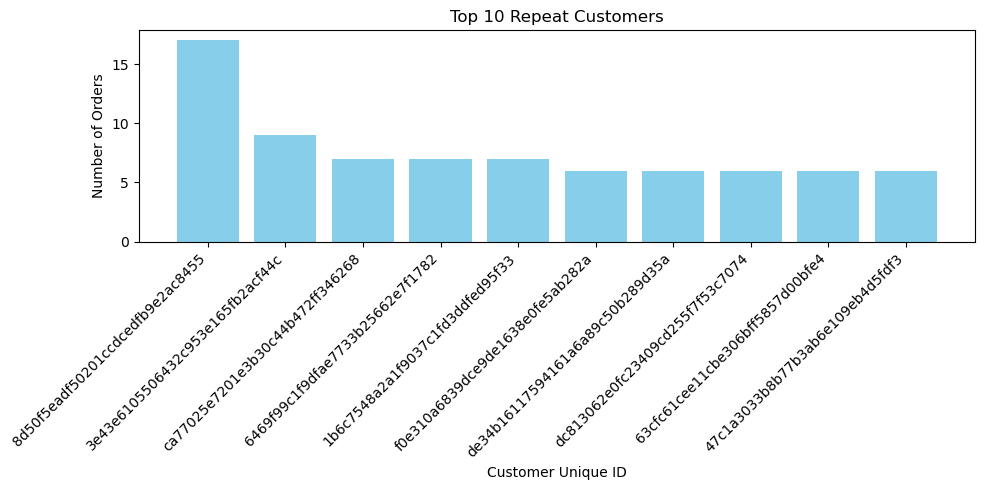

In [3]:
import matplotlib.pyplot as plt

# Bar chart for top repeat customers
plt.figure(figsize=(10,5))
plt.bar(df_repeat_customers['customer_unique_id'], df_repeat_customers['total_orders'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Customer Unique ID')
plt.ylabel('Number of Orders')
plt.title('Top 10 Repeat Customers')
plt.tight_layout()
plt.show()


In [5]:
# Revenue analysis by product category
query_revenue_category = """
SELECT
    COALESCE(pct.product_category_name_english, 'Unknown') AS category,
    ROUND(SUM(op.payment_value), 2) AS total_revenue,
    COUNT(DISTINCT o.order_id) AS total_orders,
    ROUND(SUM(op.payment_value) / COUNT(DISTINCT o.order_id), 2) AS avg_order_value
FROM order_payments op
JOIN orders o
    ON op.order_id = o.order_id
JOIN order_items oi
    ON o.order_id = oi.order_id
JOIN products p
    ON oi.product_id = p.product_id
LEFT JOIN product_category_translation pct
    ON p.product_category_name = pct.product_category_name
GROUP BY category
ORDER BY total_revenue DESC
LIMIT 10;
"""

df_revenue_category = pd.read_sql_query(query_revenue_category, conn)
df_revenue_category


,category,total_revenue,total_orders,avg_order_value
0,bed_bath_table,1683442.54,9417,178.77
1,health_beauty,1632974.73,8835,184.83
2,computers_accessories,1572561.33,6689,235.10
3,furniture_decor,1409598.23,6449,218.58
4,watches_gifts,1406528.30,5624,250.09
5,sports_leisure,1375514.44,7720,178.18
6,housewares,1076725.17,5884,182.99
7,auto,837607.72,3897,214.94
8,garden_tools,826642.40,3518,234.98
9,cool_stuff,766442.57,3632,211.02


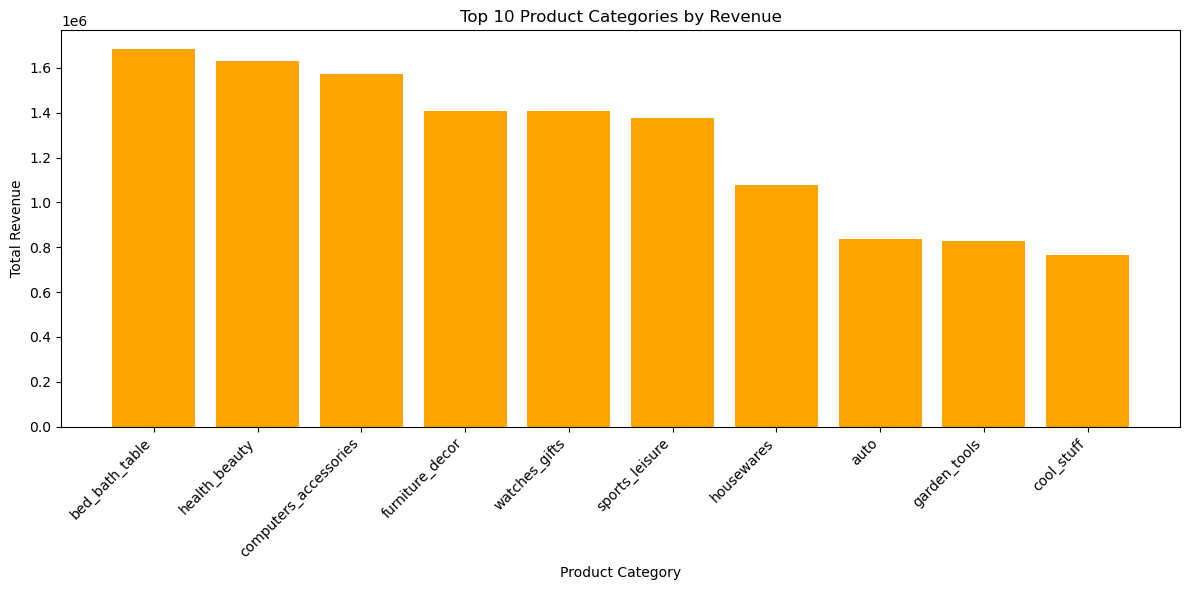

In [6]:
# Bar chart for top 10 revenue-generating categories
plt.figure(figsize=(12,6))
plt.bar(df_revenue_category['category'], df_revenue_category['total_revenue'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Top 10 Product Categories by Revenue')
plt.tight_layout()
plt.show()
